In [1]:
import dlib
import matplotlib.pyplot as pyplot
import cv2
from PIL import Image
import numpy as np

In [2]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('../shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('./dlib_face_recognition_resnet_model_v1.dat')

In [3]:
import os

In [4]:
index = []
idx = 0
face_descriptors = None

In [5]:
# Array of realtive path of train images
paths = [os.path.join('./dataset/yalefaces/train/', p) for p in os.listdir('./dataset/yalefaces/train/')]

In [6]:
for path in paths:
    image = Image.open(path).convert('RGB')

    # converting image to numpy format
    image_np = np.array(image, 'uint8')
    faces = face_detector(image_np)
    for face in faces:
        # l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        # cv2.rectangle(image_np, (l, t), (r, b), (0, 255, 0), 2)

        points = points_detector(image_np, face)
        # print(type(points)) # <class '_dlib_pybind11.full_object_detection'>

        # for point in points.parts():
            # print(type(point)) # <class '_dlib_pybind11.point'>
        
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
        # print(type(face_descriptor)) # <class '_dlib_pybind11.vector'>
        # print(len(face_descriptor)) # 128

        face_descriptor = [f for f in face_descriptor]
        # print(type(face_descriptor)) # <class 'list'>
        face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
        # print(type(face_descriptor)) # <class 'numpy.ndarray'>
        # print(face_descriptor.shape) # (128,)
        face_descriptor = face_descriptor[np.newaxis, :]
        # print(face_descriptor.shape) # (1, 128)
        if face_descriptors is None:
            face_descriptors = face_descriptor
            # index.append(path)
        else:
            face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis=0)
        index.append(path)

In [9]:
np.linalg.norm(face_descriptors[22] - face_descriptors[22])

0.0

In [20]:
comparison = np.linalg.norm(face_descriptors[22] - face_descriptors, axis=1)
print(comparison)

[0.76906705 0.82992289 0.80798633 0.8143411  0.85752502 0.76814607
 0.82936644 0.79817741 0.80395576 0.87252395 0.88878182 0.87964745
 0.87964745 0.88043558 0.88276744 0.89099416 0.88604082 0.85313906
 0.31181301 0.3710504  0.33815804 0.33815804 0.         0.41578626
 0.37798897 0.44219681 0.38764056 0.79961524 0.82803619 0.82699318
 0.8205466  0.79952774 0.79614206 0.79952774 0.79490633 0.76523274
 0.76267069 0.77592692 0.80505232 0.81940002 0.79187247 0.77572949
 0.80432657 0.78246327 0.79331338 0.71430968 0.76468481 0.74821273
 0.74821273 0.73053733 0.732435   0.75303231 0.75200075 0.78814013
 0.88264755 0.81859762 0.87305708 0.87305708 0.86318138 0.86658584
 0.85920137 0.89134157 0.88638415 0.72438533 0.70319991 0.69376479
 0.62723715 0.7302237  0.72505155 0.72662464 0.68682171 0.69923588
 0.63097918 0.63449142 0.7151477  0.6706167  0.66934262 0.66934262
 0.64574755 0.62918006 0.62536981 0.7502328  0.75638982 0.75671748
 0.72126834 0.74376784 0.75228885 0.74400624 0.7387872  0.7671

In [21]:
np.argmin(comparison)

22

In [22]:
# ######################################################################### #

In [24]:
# Testing #

In [49]:
import matplotlib.pyplot as plt
def display(image): #function to display image
    temp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(temp)
    plt.axis('off')
    plt.show()

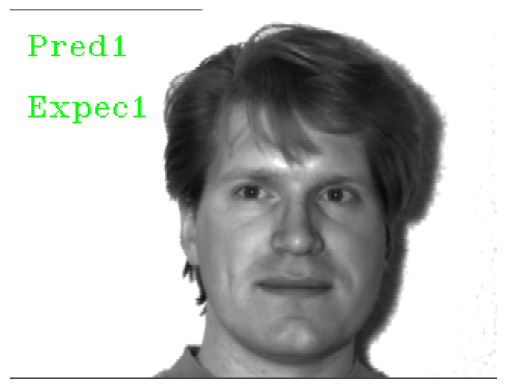

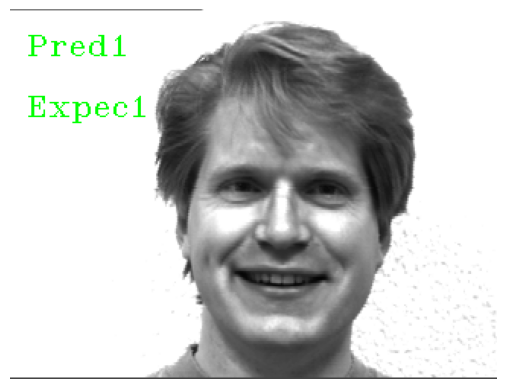

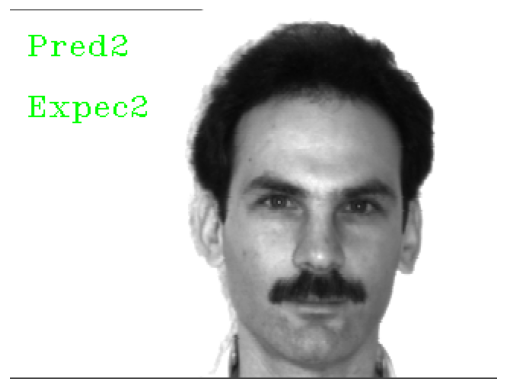

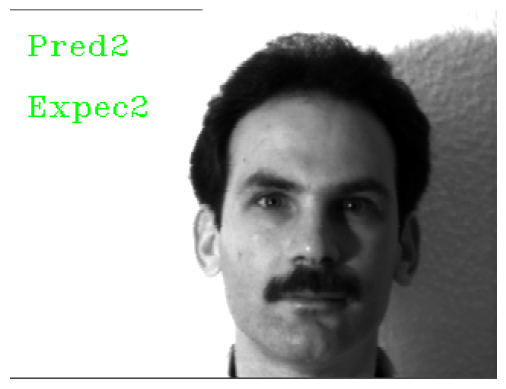

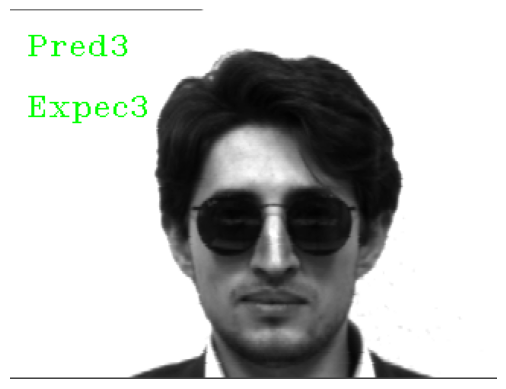

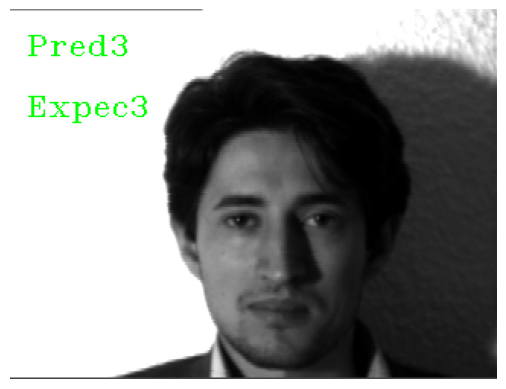

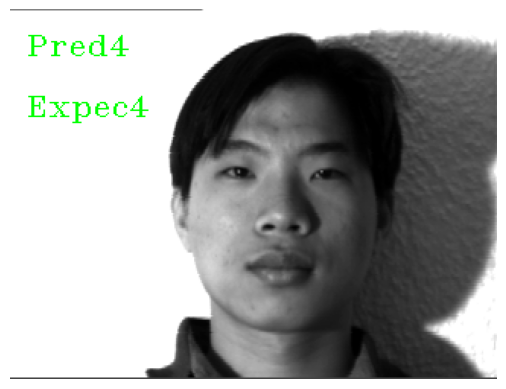

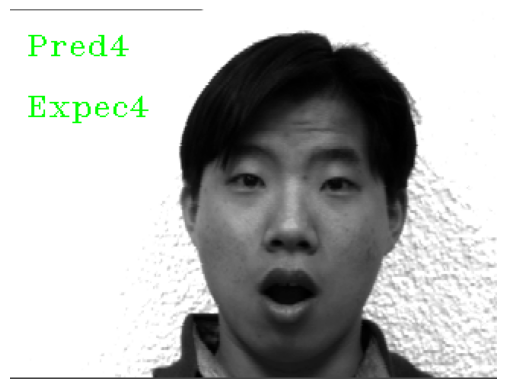

KeyboardInterrupt: 

In [52]:
test_paths = None
test_paths = [os.path.join('./dataset/yalefaces/test/', f) for f in os.listdir('./dataset/yalefaces/test/')]
for path in test_paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    faces = face_detector(image_np)
    for face in faces:
        points = points_detector(image_np, face)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
        face_descriptor = face_descriptor[np.newaxis, :]
        distances = np.linalg.norm(face_descriptor - face_descriptors, axis=1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        if min_distance <= 0.5:
            name_predicted = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
        else:
            name_predicted = 'unknown'
        name_actual = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        # if name_predicted == name_actual:
        #     print("RECOGNIZED")
        # else:
        #     print("NOT RECOGNIZED")
        cv2.putText(image_np, 'Pred'+str(name_predicted), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
        cv2.putText(image_np, 'Expec'+str(name_actual), (10, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
        display(image_np)

